In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

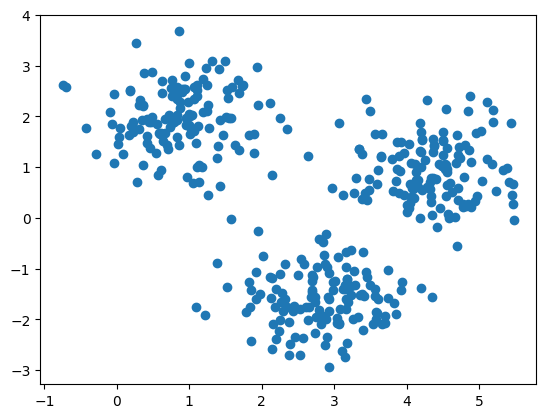

In [2]:
data = pd.read_csv('A2Q3.csv')
data = data.values
X = data[:,0]
Y = data[:,1]
# #normalizing the data
# X = (X - np.mean(X))/np.std(X)
# Y = (Y - np.mean(Y))/np.std(Y)
plt.scatter(X,Y)

In [3]:
class GMM():
    def __init__(self,X,K,iterations):
        self.X = X
        self.K = K
        self.iterations = iterations
        self.N = len(X)
        self.dim = X.shape[1]
        chosen = np.random.choice(self.N,self.K,replace = False)
        
        self.mu = X[chosen]
        # self.mu = np.random.uniform(low = np.min(X),high = np.max(X),size = (K,self.dim))
        self.pi = np.ones(K)/K
        self.sigma = np.full((K,self.dim,self.dim),np.cov(X.T))
        # self.sigma = np.random.rand(K,self.dim,self.dim)
        self.gamma = np.zeros((self.N,self.K))
        self.LLs = []
        self.initial_mu = self.mu
        self.initial_sigma = self.sigma
    
    def fit(self):
        for i in range(self.iterations):
            self.E_step()
            self.M_step()
            cur_LL = self.log_likelihood()
            self.LLs.append(cur_LL)
            # print("Log Likelihood after ",i+1," iterations: ",cur_LL)
    
    def E_step(self):
        for i in range(self.N):
            for j in range(self.K):
                self.gamma[i,j] = self.pi[j]*self.gaussian(self.X[i],self.mu[j],self.sigma[j])
            self.gamma[i] /= np.sum(self.gamma[i])
    
    def M_step(self):
        for j in range(self.K):
            sum_gamma = np.sum(self.gamma[:,j])
            self.mu[j] = np.sum(self.gamma[:,j].reshape(-1,1)*self.X,axis = 0)/sum_gamma
            self.pi[j] = sum_gamma/self.N
            self.sigma[j] = np.zeros((self.dim,self.dim))
            for i in range(self.N):
                self.sigma[j] += self.gamma[i,j]*np.outer(self.X[i]-self.mu[j],self.X[i]-self.mu[j])
            self.sigma[j] /= sum_gamma

    def gaussian(self,x,mu,sigma):
        return multivariate_normal(mu,sigma).pdf(x)
    
    def log_likelihood(self):
        LL = 0.0
        for i in range(self.N):
            LL_k = 0.0
            for j in range(self.K):
                LL_k += self.pi[j]*self.gaussian(X[i],self.mu[j],self.sigma[j])
            LL+=LL_k
        return(LL)
    
    


In [4]:
def plot_contours(data,means,covs):
    plt.figure()
    plt.plot(data[:, 0], data[:, 1], 'ko')

    delta = 0.025
    k = means.shape[0]
    x = np.arange(-7.0, 7.0, delta)
    y = np.arange(-7.0, 7.0, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
    
    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_grid.shape)
        plt.contour(x_grid, y_grid, z_grid, colors = col[i])
    plt.title("GMM")
    plt.tight_layout()


In [5]:
for i in range(3,4):
    model = GMM(data,i,100)
    model.fit()
    print("Log Likelihood for K = ",i," : ",{model.LLs[99]})
    # plot_contours(data,model.mu,model.sigma)


Log Likelihood for K =  3  :  {4.858265162231014}


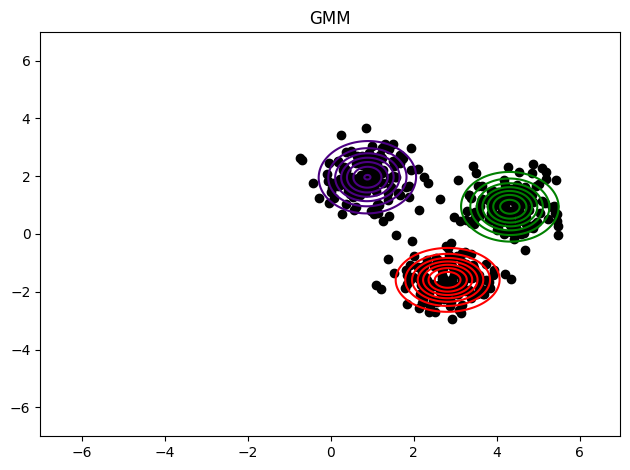

In [6]:
plot_contours(data,model.mu,model.sigma)

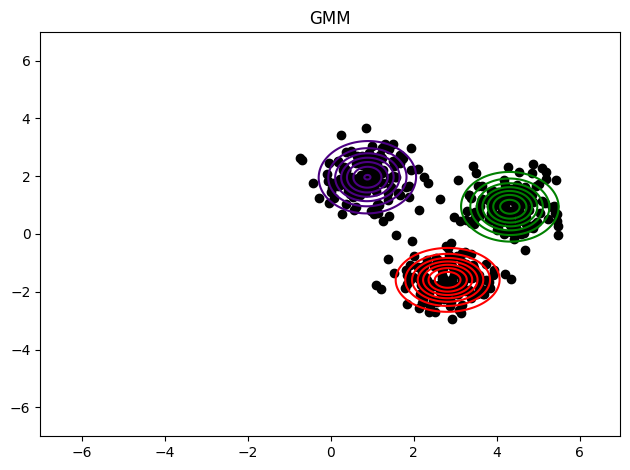

In [7]:
plot_contours(data,model.initial_mu,model.initial_sigma)